<a href="https://colab.research.google.com/github/Vaelastraszz/Text_representation/blob/master/Text_representation_and_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


<h2> One hot encoding with hashing trick </h2>

In [0]:
samples = ['the cat sat on the bed', "the dog ate my homework"]

dim = 1000
max_lenght = 10

In [0]:
results = np.zeros((len(samples), max_lenght, dim))

In [0]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_lenght]:
        index = abs(hash(word)) % dim
        results[i,j, index] = 1

<h2> Words Embedding </h2>

<h3> Loading data </h3>

In [0]:
from keras.datasets import imdb
from keras import preprocessing

In [0]:
max_features = 10000
maxlen = 20

In [0]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

<h3> Embedding layer preparation (flat dense layer) + model </h3>

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [0]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

In [0]:
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32,validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 93us/step - loss: 0.6609 - acc: 0.6351 - val_loss: 0.6011 - val_acc: 0.7024
Epoch 2/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.5273 - acc: 0.7549 - val_loss: 0.5171 - val_acc: 0.7386
Epoch 3/10
20000/20000 [==============================] - 1s 64us/step - loss: 0.4564 - acc: 0.7896 - val_loss: 0.4968 - val_acc: 0.7476
Epoch 4/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.4223 - acc: 0.8059 - val_loss: 0.4939 - val_acc: 0.7536
Epoch 5/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.3990 - acc: 0.8216 - val_loss: 0.4943 - val_acc: 0.7542
Epoch 6/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.3796 - acc: 0.8321 - val_loss: 0.4963 - val_acc: 0.7600
Epoch 7/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.3617 - acc: 0.8416 - val_loss: 0.5001 - val_acc

<h2> Using pre-trained embedding layer with GloVe </h2>

In [0]:
import os

In [0]:
imdb_dir = '/content/gdrive/My Drive/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

In [0]:
labels, texts = [], []

In [0]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    counter = 0
    for fname in os.listdir(dir_name):
        if fname[-4:] == ".txt":
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close
            labels.append(0) if label_type == "neg" else labels.append(1)
                

<h3> Tokenizing text from raw Imdb </h3>

In [0]:
from keras_preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
maxlen = 100
training_samples = 200
validation_samples = 5000
max_words = 10000

In [0]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [0]:
word_index = tokenizer.word_index

In [0]:
data = pad_sequences(sequences, maxlen=max)

(6374, 100)

In [0]:
labels = np.asarray(labels)

In [0]:
indices = np.arange(data.shape[0])

In [0]:
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [0]:
x_train = data[:training_samples]
y_train =  labels[:training_samples]

x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

<h3> Parsing glove embedding file </h3>

In [0]:
glove_dir = '/content/gdrive/My Drive/GloVe/glove.6B'

embeddings_index = {}

In [0]:
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

In [0]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [0]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None :
        embedding_matrix[i] = embedding_vector

<h3> Model Creation </h3>

In [0]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

In [0]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data = (x_val,y_val))

Train on 200 samples, validate on 5000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 2.9560 - acc: 0.6100 - val_loss: 0.5999 - val_acc: 0.7052
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4617 - acc: 0.8100 - val_loss: 0.5836 - val_acc: 0.7392
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3239 - acc: 0.8550 - val_loss: 0.8761 - val_acc: 0.3830
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2225 - acc: 0.9150 - val_loss: 0.8610 - val_acc: 0.7384
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1301 - acc: 0.9650 - val_loss: 0.5841 - val_acc: 0.7354
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0581 - acc: 1.0000 - val_loss: 0.6219 - val_acc: 0.6594
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0499 - acc: 1.0000 - val_loss: 0.6217 - val_acc: 0.7358
Epoch 8/10
200/200 [=========

<h3> Plotting results </h3>

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1, len(acc)+1)

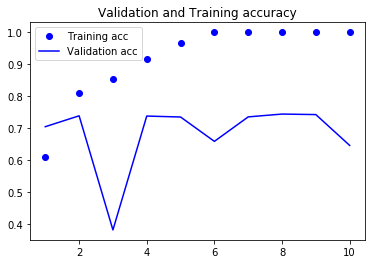

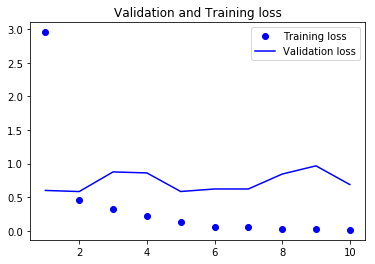

In [0]:
plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title("Validation and Training accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label ='Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title("Validation and Training loss")
plt.legend()

plt.show()